## Regressão Linear

### Estimar o retorno o Ibovespa a partir dos retornos percentuais de algumas ações

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\juini\anaconda3\envs\py38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:

df = pd.DataFrame()

symbols = ['ITUB4.SA','BBDC4.SA','PETR4.SA','VALE3.SA','ABEV3.SA','^BVSP']


for ticker in symbols: 
    r = web.DataReader(ticker, "yahoo")[['Close']].pct_change()
    df[ticker + 'Return'] = r['Close']


df['alvo'] = df['^BVSPReturn'].shift(-1)

df.dropna(inplace=True)
df.head()


,ITUB4.SAReturn,BBDC4.SAReturn,PETR4.SAReturn,VALE3.SAReturn,ABEV3.SAReturn,^BVSPReturn,alvo
Date,,,,,,,
2015-05-05,-0.009758,0.003401,0.046410,0.092010,0.011892,0.012170,-0.016347
2015-05-06,-0.025147,-0.024651,-0.044352,-0.078714,0.013797,-0.016347,-0.003187
2015-05-07,0.003987,-0.003791,-0.009427,-0.042118,-0.016633,-0.003187,0.004006
2015-05-08,0.013246,0.003806,-0.010981,-0.047320,0.018965,0.004006,0.000840
2015-05-11,-0.004707,-0.003159,0.019245,0.023297,-0.007545,0.000840,-0.007081


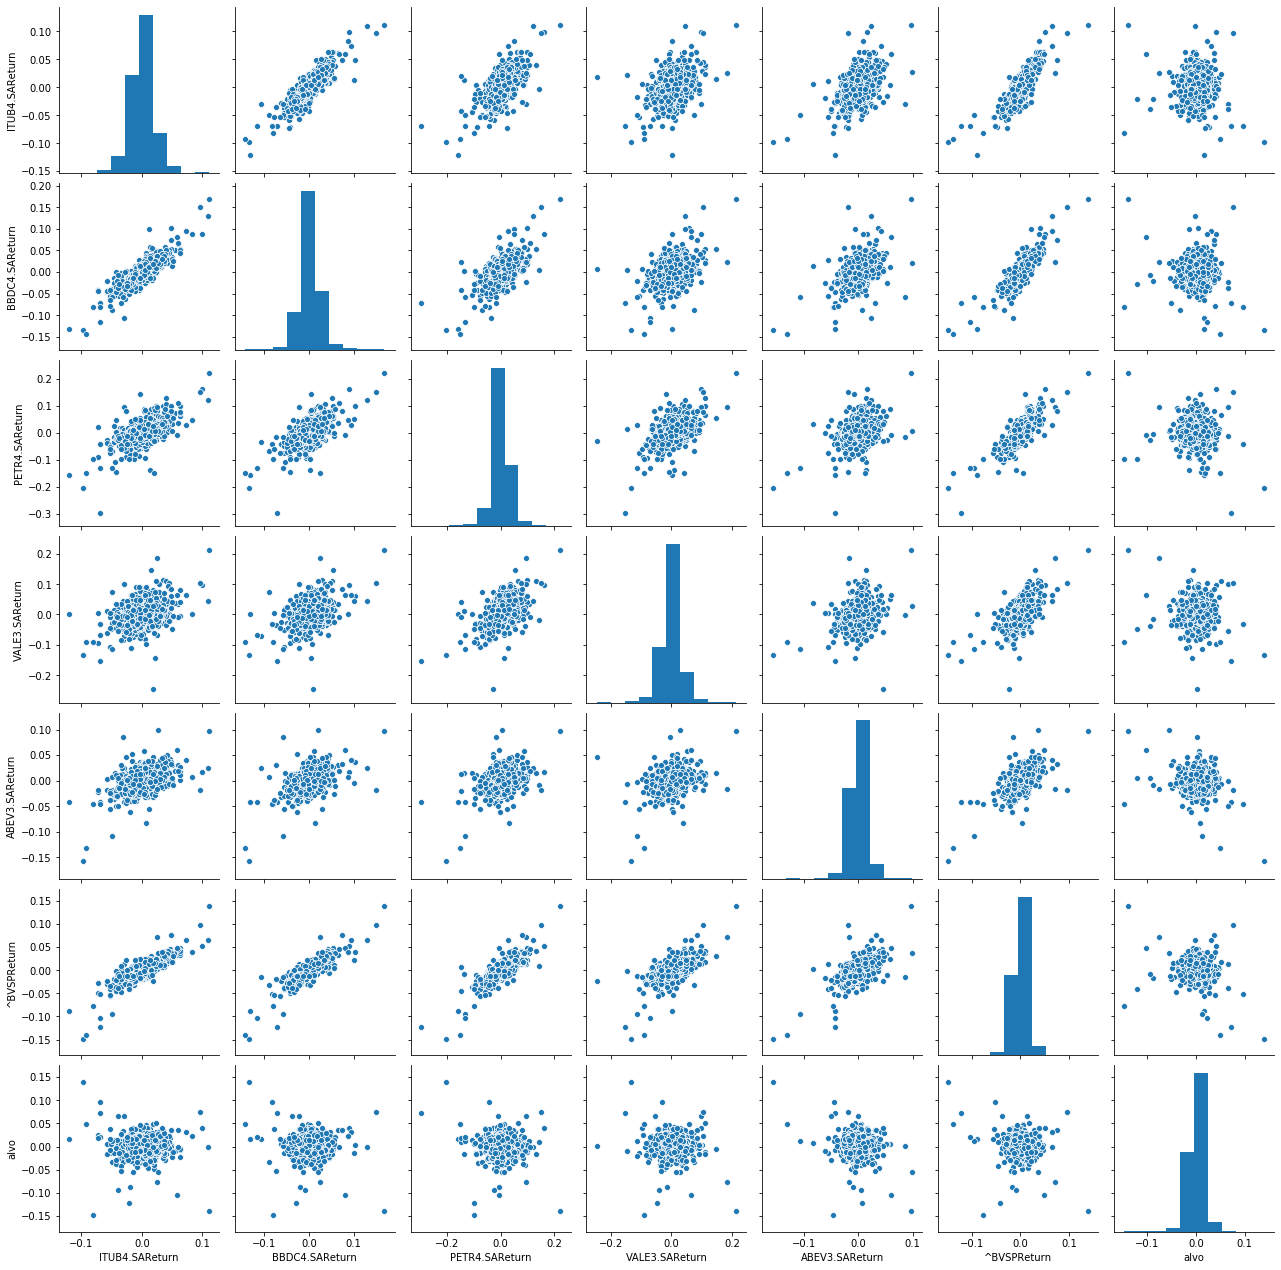

In [4]:
sns.pairplot(df)

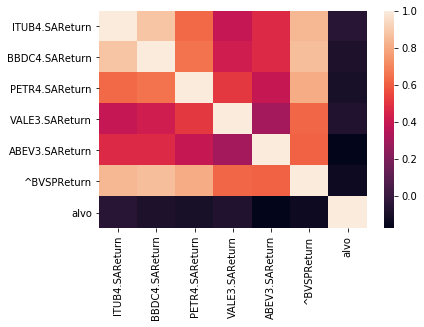

In [5]:
sns.heatmap(df.corr())

In [6]:
X = df.drop(['^BVSPReturn','alvo'], axis=1)

y = df[['alvo']]

X.head()

,ITUB4.SAReturn,BBDC4.SAReturn,PETR4.SAReturn,VALE3.SAReturn,ABEV3.SAReturn
Date,,,,,
2015-05-05,-0.009758,0.003401,0.046410,0.092010,0.011892
2015-05-06,-0.025147,-0.024651,-0.044352,-0.078714,0.013797
2015-05-07,0.003987,-0.003791,-0.009427,-0.042118,-0.016633
2015-05-08,0.013246,0.003806,-0.010981,-0.047320,0.018965
2015-05-11,-0.004707,-0.003159,0.019245,0.023297,-0.007545


In [7]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
modelo = LinearRegression()

modelo.fit(X_treino,y_treino)

p = modelo.predict(X_teste)

result = pd.DataFrame(y_teste)


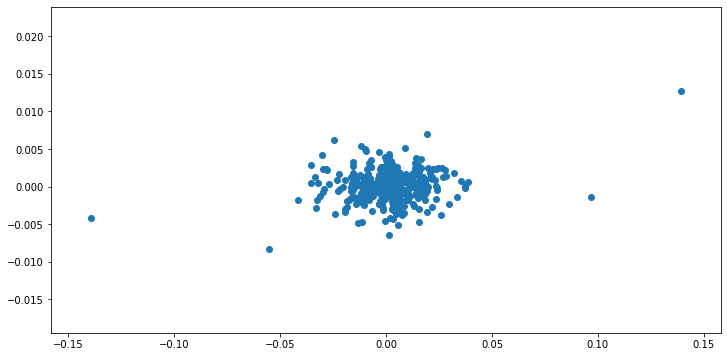

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(y_teste,p)

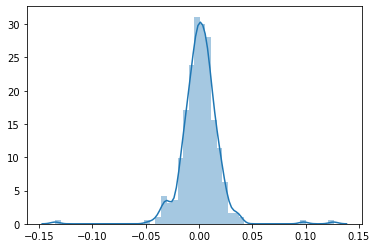

In [11]:
sns.distplot(y_teste-p)

In [12]:
result['Predição'] = p
result['Acertou'] = np.select([result['alvo'] * result['Predição'] > 0], [1], default=0)
result.head()

,alvo,Predição,Acertou
Date,,,
2019-08-06,0.006049,0.001464,1
2016-07-05,0.001157,-0.000980,0
2019-09-04,0.010296,-0.001560,0
2016-07-06,0.002177,0.000673,1
2015-09-28,0.003981,0.001359,1


In [13]:
acc = np.mean(result['Acertou']==1)

print("acurácia",acc)

acurácia 0.5149051490514905
